In [1]:
import pandas as pd
import numpy as np
import csv
from ydata_profiling import ProfileReport
import seaborn as sc

/Users/raquelrocha/anaconda3/envs/data-mining/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/raquelrocha/anaconda3/envs/data-mining/lib/python3.11/site-packages/visions/backends/shared/nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


In [2]:
sports_data_orig = pd.read_csv('XYZ_sports_dataset.csv', delimiter =";")
sports_data = sports_data_orig


FileNotFoundError: [Errno 2] No such file or directory: 'XYZ_sports_dataset.csv'

In [ ]:
sports_data.head(2)

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
0,10000,60,Female,5500.0,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,...,0.0,9.0,7,NaN,6.28,2,0,0.0,0,0
1,10001,29,Female,2630.0,2014-08-12,2015-09-14,2015-01-01,2015-12-31,2015-07-16,60,...,0.0,23.0,1,2.0,17.42,1,2,0.0,0,1


In [ ]:
sports_data.describe()

,ID,Age,Income,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
count,14942.000000,14942.000000,14447.000000,14942.000000,14942.000000,14942.000000,14906.00000,14905.000000,14907.000000,14906.0,...,14907.000000,14916.000000,14942.000000,14407.000000,14942.000000,14942.000000,14942.000000,14930.000000,14942.000000,14942.000000
mean,17470.500000,26.015794,2230.816086,81.224936,302.561871,0.047116,0.00738,0.296209,0.576038,0.0,...,0.001878,40.120542,10.152456,5.759561,41.636299,5.320707,1.205260,0.019893,0.022286,0.800964
std,4313.528196,14.156582,1566.527734,144.199576,364.319566,0.211893,0.08559,0.456600,0.494201,0.0,...,0.043300,65.466459,29.154202,2.118867,21.066166,6.332958,1.381305,0.139637,0.166777,0.399289
min,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,...,0.000000,1.000000,0.000000,1.000000,0.560000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13735.250000,19.000000,1470.000000,13.000000,83.600000,0.000000,0.00000,0.000000,0.000000,0.0,...,0.000000,7.000000,0.000000,4.000000,25.720000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,17470.500000,23.000000,1990.000000,41.000000,166.200000,0.000000,0.00000,0.000000,1.000000,0.0,...,0.000000,18.000000,0.000000,7.000000,38.990000,4.000000,1.000000,0.000000,0.000000,1.000000
75%,21205.750000,31.000000,2790.000000,83.750000,355.075000,0.000000,0.00000,1.000000,1.000000,0.0,...,0.000000,45.000000,3.000000,7.000000,60.970000,7.000000,2.000000,0.000000,0.000000,1.000000
max,24941.000000,87.000000,10890.000000,1745.000000,6727.800000,1.000000,1.00000,1.000000,1.000000,0.0,...,1.000000,1031.000000,581.000000,7.000000,240.030000,84.000000,6.000000,1.000000,3.000000,1.000000


<h1> Incoherences </h1>

In [ ]:
sports_data[(sports_data['Age'] < 16) & (sports_data['Income'] > 0)]


#set income as zero when the age is under 16 
sports_data.loc[(sports_data['Age'] < 16), 'Income'] = 0

In [ ]:
sports_data

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
0,10000,60,Female,5500.0,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,...,0.0,9.0,7,NaN,6.28,2,0,0.0,0,0
1,10001,29,Female,2630.0,2014-08-12,2015-09-14,2015-01-01,2015-12-31,2015-07-16,60,...,0.0,23.0,1,2.0,17.42,1,2,0.0,0,1
2,10002,23,Male,1980.0,2017-05-02,2017-06-01,2017-01-01,2017-06-30,2017-05-25,7,...,0.0,6.0,0,7.0,30.03,6,0,0.0,0,1
3,10003,9,Male,0.0,2018-09-05,2019-02-12,2018-07-01,2019-06-30,2019-01-21,22,...,0.0,20.0,2,2.0,17.72,3,0,0.0,0,1
4,10004,35,Male,4320.0,2016-04-20,2018-06-07,2018-01-01,2018-06-30,2017-11-09,210,...,NaN,41.0,0,7.0,60.97,0,3,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14937,24937,14,Male,0.0,2016-09-08,2016-09-08,2019-07-01,2019-12-31,2019-10-29,2,...,0.0,112.0,96,4.0,34.84,8,3,0.0,0,0
14938,24938,39,Male,NaN,2015-09-17,2016-06-04,2016-01-01,2016-06-30,2016-04-27,38,...,0.0,57.0,0,7.0,60.97,3,0,0.0,0,1
14939,24939,20,Male,1810.0,2017-03-01,2017-03-31,2017-01-01,2017-06-30,2017-03-29,2,...,0.0,6.0,0,7.0,30.03,8,0,0.0,0,1
14940,24940,55,Male,4800.0,2018-03-01,2018-03-01,2019-07-01,2019-12-31,2019-10-28,3,...,0.0,185.0,155,3.0,15.87,7,2,0.0,0,0


In [ ]:
# replace "" by nans
sports_data.replace("", np.nan, inplace=True)

# count of missing values
sports_data.isna().sum()

ID                              0
Age                             0
Gender                          0
Income                        155
EnrollmentStart                 0
EnrollmentFinish                0
LastPeriodStart                 0
LastPeriodFinish                0
DateLastVisit                   0
DaysWithoutFrequency            0
LifetimeValue                   0
UseByTime                       0
AthleticsActivities            36
WaterActivities                37
FitnessActivities              35
DanceActivities                36
TeamActivities                 35
RacketActivities               37
CombatActivities               33
NatureActivities               47
SpecialActivities              44
OtherActivities                35
NumberOfFrequencies            26
AttendedClasses                 0
AllowedWeeklyVisitsBySLA      535
AllowedNumberOfVisitsBySLA      0
RealNumberOfVisits              0
NumberOfRenewals                0
HasReferences                  12
NumberOfRefere

In [ ]:
#considerar apenas fitness activities para maiores de 16 anos 

drop_fitness_above_16 = sports_data[(sports_data['FitnessActivities'] == 1) & (sports_data['Age'] < 16)].index
sports_data.drop(drop_fitness_above_16, inplace=True)

sports_data[(sports_data['FitnessActivities'] == 1) & (sports_data['Age'] < 16)]

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout


In [ ]:
pd.set_option('display.max_columns', None)
#Drop every child before 4 years old who is doing other activities that are not water

activities_before_4_years = (sports_data['Age'] < 4) & (
    ((sports_data['TeamActivities'] == 1) | (sports_data['SpecialActivities'] == 1) | (sports_data['CombatActivities'] == 1) |
     (sports_data['RacketActivities'] == 1) | (sports_data['AthleticsActivities'] == 1) | (sports_data['FitnessActivities'] == 1) |
     (sports_data['DanceActivities'] == 1) | (sports_data['NatureActivities'] == 1))
)

sports_data.drop(sports_data[activities_before_4_years].index, inplace=True)

In [ ]:
sports_data[sports_data['EnrollmentStart'] == sports_data['EnrollmentFinish']]

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,TeamActivities,RacketActivities,CombatActivities,NatureActivities,SpecialActivities,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
25,10025,13,Female,0.0,2015-09-09,2015-09-09,2019-07-01,2019-12-31,2019-10-26,5,596.30,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,18,2.0,6.28,3,4,0.0,0,0
36,10036,13,Female,0.0,2014-10-02,2014-10-02,2019-07-01,2019-12-31,2019-10-22,9,2209.97,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,199.0,166,2.0,17.14,5,5,1.0,1,0
38,10038,38,Female,1910.0,2018-09-29,2018-09-29,2019-07-01,2019-12-31,2019-10-30,1,554.60,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127.0,125,3.0,26.13,25,1,0.0,0,0
49,10049,56,Male,6540.0,2018-09-03,2018-09-03,2019-07-01,2019-12-31,2019-10-29,2,540.10,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,112.0,0,7.0,60.97,32,1,0.0,0,0
51,10051,12,Female,0.0,2018-08-17,2018-08-17,2019-07-01,2019-12-31,2019-10-28,3,852.30,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,42.0,42,4.0,34.84,4,2,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14918,24918,73,Male,3870.0,2014-12-10,2014-12-10,2019-07-01,2019-12-31,2019-10-31,0,1583.90,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,472.0,0,7.0,60.97,45,5,0.0,0,0
14919,24919,1,Female,0.0,2019-07-18,2019-07-18,2019-07-01,2019-12-31,2019-10-31,0,201.20,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,7,2.0,17.14,7,1,0.0,0,0
14926,24926,24,Female,3290.0,2018-10-08,2018-10-08,2019-01-01,2019-12-31,2019-10-29,2,196.10,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,37,2.0,17.42,7,1,0.0,0,0
14937,24937,14,Male,0.0,2016-09-08,2016-09-08,2019-07-01,2019-12-31,2019-10-29,2,1460.45,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,112.0,96,4.0,34.84,8,3,0.0,0,0


In [ ]:
sports_data.loc[sports_data['Dropout'] == 0, 'EnrollmentFinish'] = pd.to_datetime('2019-12-31')

sports_data[sports_data['Dropout'] == 0]['EnrollmentFinish']

0        2019-12-31 00:00:00
19       2019-12-31 00:00:00
25       2019-12-31 00:00:00
34       2019-12-31 00:00:00
36       2019-12-31 00:00:00
                ...         
14918    2019-12-31 00:00:00
14919    2019-12-31 00:00:00
14926    2019-12-31 00:00:00
14937    2019-12-31 00:00:00
14940    2019-12-31 00:00:00
Name: EnrollmentFinish, Length: 2972, dtype: object

In [ ]:
#Cases in which the client is not a dropout, but the days without frequency is bigger than 0

sports_data.loc[(sports_data['DaysWithoutFrequency'] != 0) & (sports_data['Dropout'] == 0), 'DaysWithoutFrequency'] = 0

sports_data[(sports_data['DaysWithoutFrequency'] != 0) & (sports_data['Dropout'] == 0)]


,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,TeamActivities,RacketActivities,CombatActivities,NatureActivities,SpecialActivities,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout


In [ ]:
sports_data['RelativePercentageOfVisits'] = (sports_data['RealNumberOfVisits'] / sports_data['AllowedNumberOfVisitsBySLA']) * 100
            
sports_data[sports_data['RelativePercentageOfVisits'] > 100] #PORQUE RAIO É QUE HA GENTE QUE VAI MAIS VEZES DO QUE O PERMITIDO CRL????
#tambem podemos so assumir que é falta de controlo por parte do ginasio 
#real number -> Indicates the actual number of visits that the user made to the facilities in the last period his registration (between LastPeriodStart and LastPeriodFinish)
#allowed number -> Indicates the total number of visits that the user can make to the facilities according to the service he had hired in the last 2 months of his registration (between LastPeriodStart and LastPeriodFinish)



,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,TeamActivities,RacketActivities,CombatActivities,NatureActivities,SpecialActivities,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout,RelativePercentageOfVisits
271,10271,35,Female,1000.0,2015-02-20,2019-12-31 00:00:00,2019-07-01,2019-12-31,2019-10-29,0,1235.85,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,196.0,191,2.0,6.86,10,5,0.0,0,0,145.772595
354,10354,48,Female,4390.0,2016-09-12,2019-10-31,2017-01-01,2017-12-31,2019-10-31,0,441.30,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,214.0,0,7.0,30.03,34,3,0.0,0,1,113.220113
409,10409,20,Female,1650.0,2016-09-20,2019-12-31 00:00:00,2019-07-01,2019-12-31,2019-10-31,0,711.40,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,191.0,126,3.0,19.29,49,3,0.0,0,0,254.017626
481,10481,54,Female,2980.0,2018-11-12,2019-12-31 00:00:00,2019-07-01,2019-12-31,2019-10-29,0,337.85,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,59,2.0,17.42,26,1,0.0,0,0,149.253731
672,10672,60,Female,5170.0,2015-05-05,2019-12-31 00:00:00,2019-07-01,2019-12-31,2019-10-31,0,1529.55,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322.0,318,2.0,8.58,11,5,0.0,0,0,128.205128
1034,11034,32,Male,2960.0,2019-10-09,2019-12-31 00:00:00,2019-07-01,2019-12-31,2019-10-31,0,90.20,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,5,NaN,6.28,8,0,0.0,0,0,127.388535
1232,11232,33,Male,2470.0,2015-08-19,2019-12-31 00:00:00,2019-07-01,2019-12-31,2019-10-30,0,1421.70,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,263.0,253,2.0,17.42,24,5,0.0,0,0,137.772675
1862,11862,12,Male,0.0,2016-07-19,2019-12-31 00:00:00,2019-07-01,2019-12-31,2019-10-26,0,1154.10,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,67.0,34,1.0,6.71,7,4,0.0,0,0,104.321908
1890,11890,24,Female,2040.0,2015-07-06,2016-08-01,2016-01-01,2016-12-31,2016-07-20,12,205.00,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20,1.0,8.71,10,2,0.0,0,1,114.810563
1964,11964,60,Male,5030.0,2015-12-09,2016-07-31,2016-01-01,2016-12-31,2016-07-30,1,192.60,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,11,1.0,8.71,10,0,0.0,0,1,114.810563


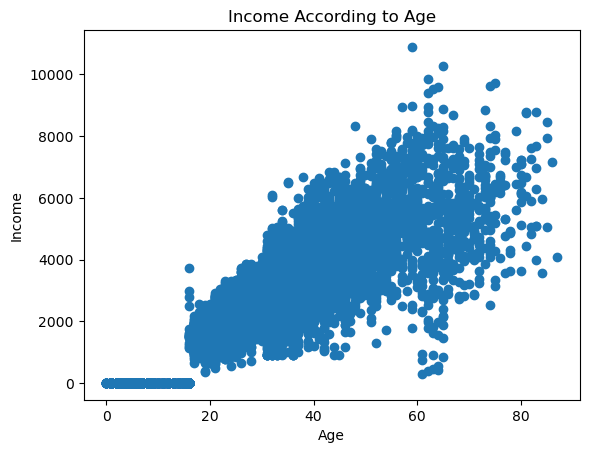

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


plt.scatter(sports_data['Age'], sports_data['Income'])
plt.title('Income According to Age')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

#nao faz sentido que o salario esteja a aumentar depois da reforma 


In [ ]:
pd.set_option('display.max_columns', None)

sports_data[sports_data['NumberOfFrequencies'] < sports_data['AttendedClasses']]
#podem ter ido a mais do que uma aula por dia

NameError: name 'sports_data' is not defined

incorencias
-missing values
-visualizacao
-imputation
-outliers


feature engineering
-data creation
-transformar categoricas em numericas

feature selection
-testar correlacoes e selecionar variaveis para drop 

- imputation no income vazio